In [387]:
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
df=pd.read_csv(url)
df
df.to_csv("abalone.csv",sep='\t')

In [388]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


here sex column has categorical noimal datatype.Ring column has categorical(ordinal) data type.all other features are continous data type.so it is a Regression problem.

In [389]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

(-1.114907474741872, 1.1168909812346863, -1.11264205313924, 1.1191564028373182)

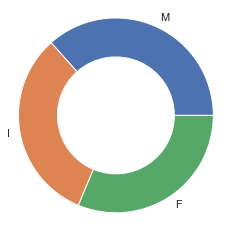

In [390]:
sorted_counts=df['Sex'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

We can observe from the above picture,that the result class of the dataset is nearly a balanced class.That means the no of males,females and Infants of the Abalone are almost equal. 

In [391]:
df.groupby(['Sex'])['Rings'].count()

Sex
F    1307
I    1342
M    1528
Name: Rings, dtype: int64

The number of Male,Female and Infant Abalones are almost equal.

In [392]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df    

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [393]:

v=df[list(df.columns)[0]] 
df=df.drop(['Sex'],axis=1) 
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [394]:
# no of categorical columns
cat = df.select_dtypes(include='O')
# create dummies of categorical columns
df1 = pd.get_dummies(df,drop_first = True)
print(df1)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  
0          

In [395]:
#predicting Age column value with the help of Ring column value
df1['Age']=[ x+1.5 for x in df1.Rings]
print(df1)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings   Age  
0    

In [396]:
df1.insert(0,'Sex',v) 
df1


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [397]:
df1.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [398]:
#checks nulls values of columns if present any
df1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

no coulmn has null values

In [399]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 310.1 KB


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

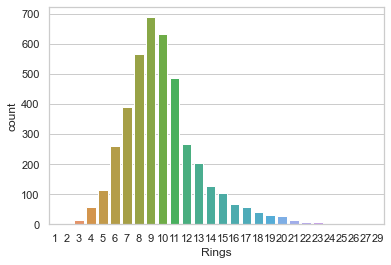

In [400]:
sns.countplot(df1['Rings'])
df1['Rings'].value_counts()

we can observe that the number of Rings is higher in the range of 8 to 10.And its Age will be in the range of 9.5 to 11.5.

<AxesSubplot:xlabel='Age', ylabel='Count'>

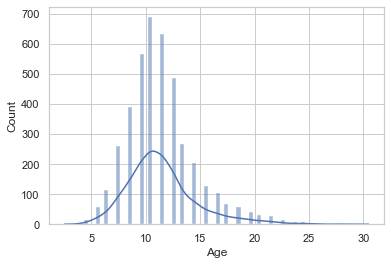

In [401]:
sns.histplot(data=df1,x='Age',kde=True)

We can observe the Maximum Abalone's Age will be in range of 9 to 12. And after 25 years abalones will not live.

<AxesSubplot:xlabel='Rings', ylabel='Age'>

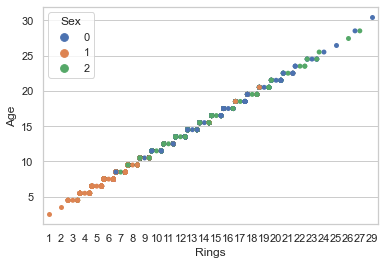

In [402]:
sns.set(style="whitegrid")
sns.swarmplot(x="Rings", y="Age", hue="Sex", data=df1)

we can observe that when the rings increases the Age will also increase and they both has high correlation and After 24 years they both start disappear because of abalones tends to not live more than that.

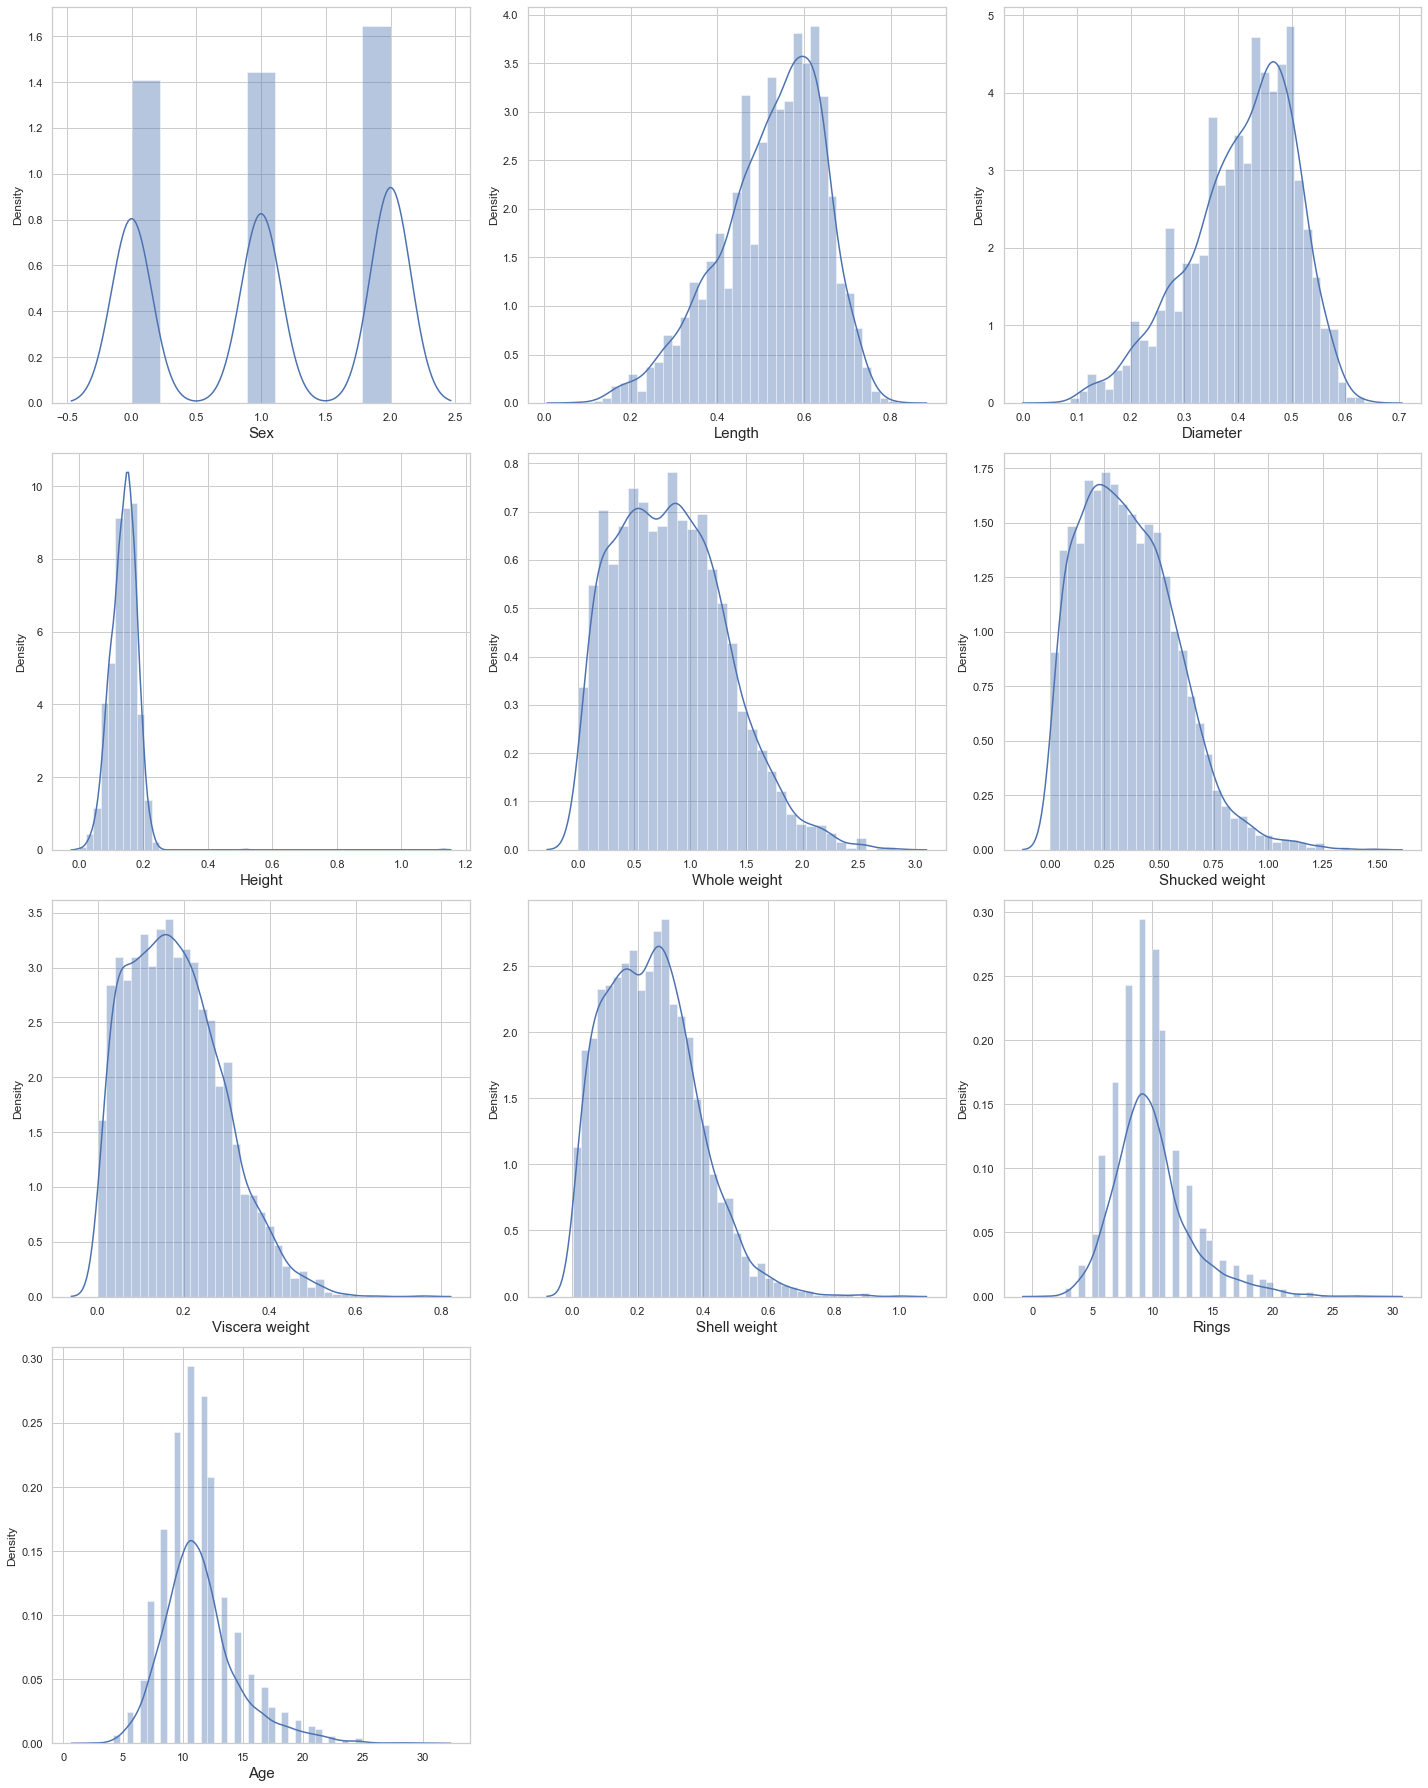

In [403]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df1:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

we can see from the above distribution that all the columns are meeting almost normal distribution but the height column has highest peak because it has some outliers,so it pulled the graph to peak.Other than this the columns are having little skewness only.

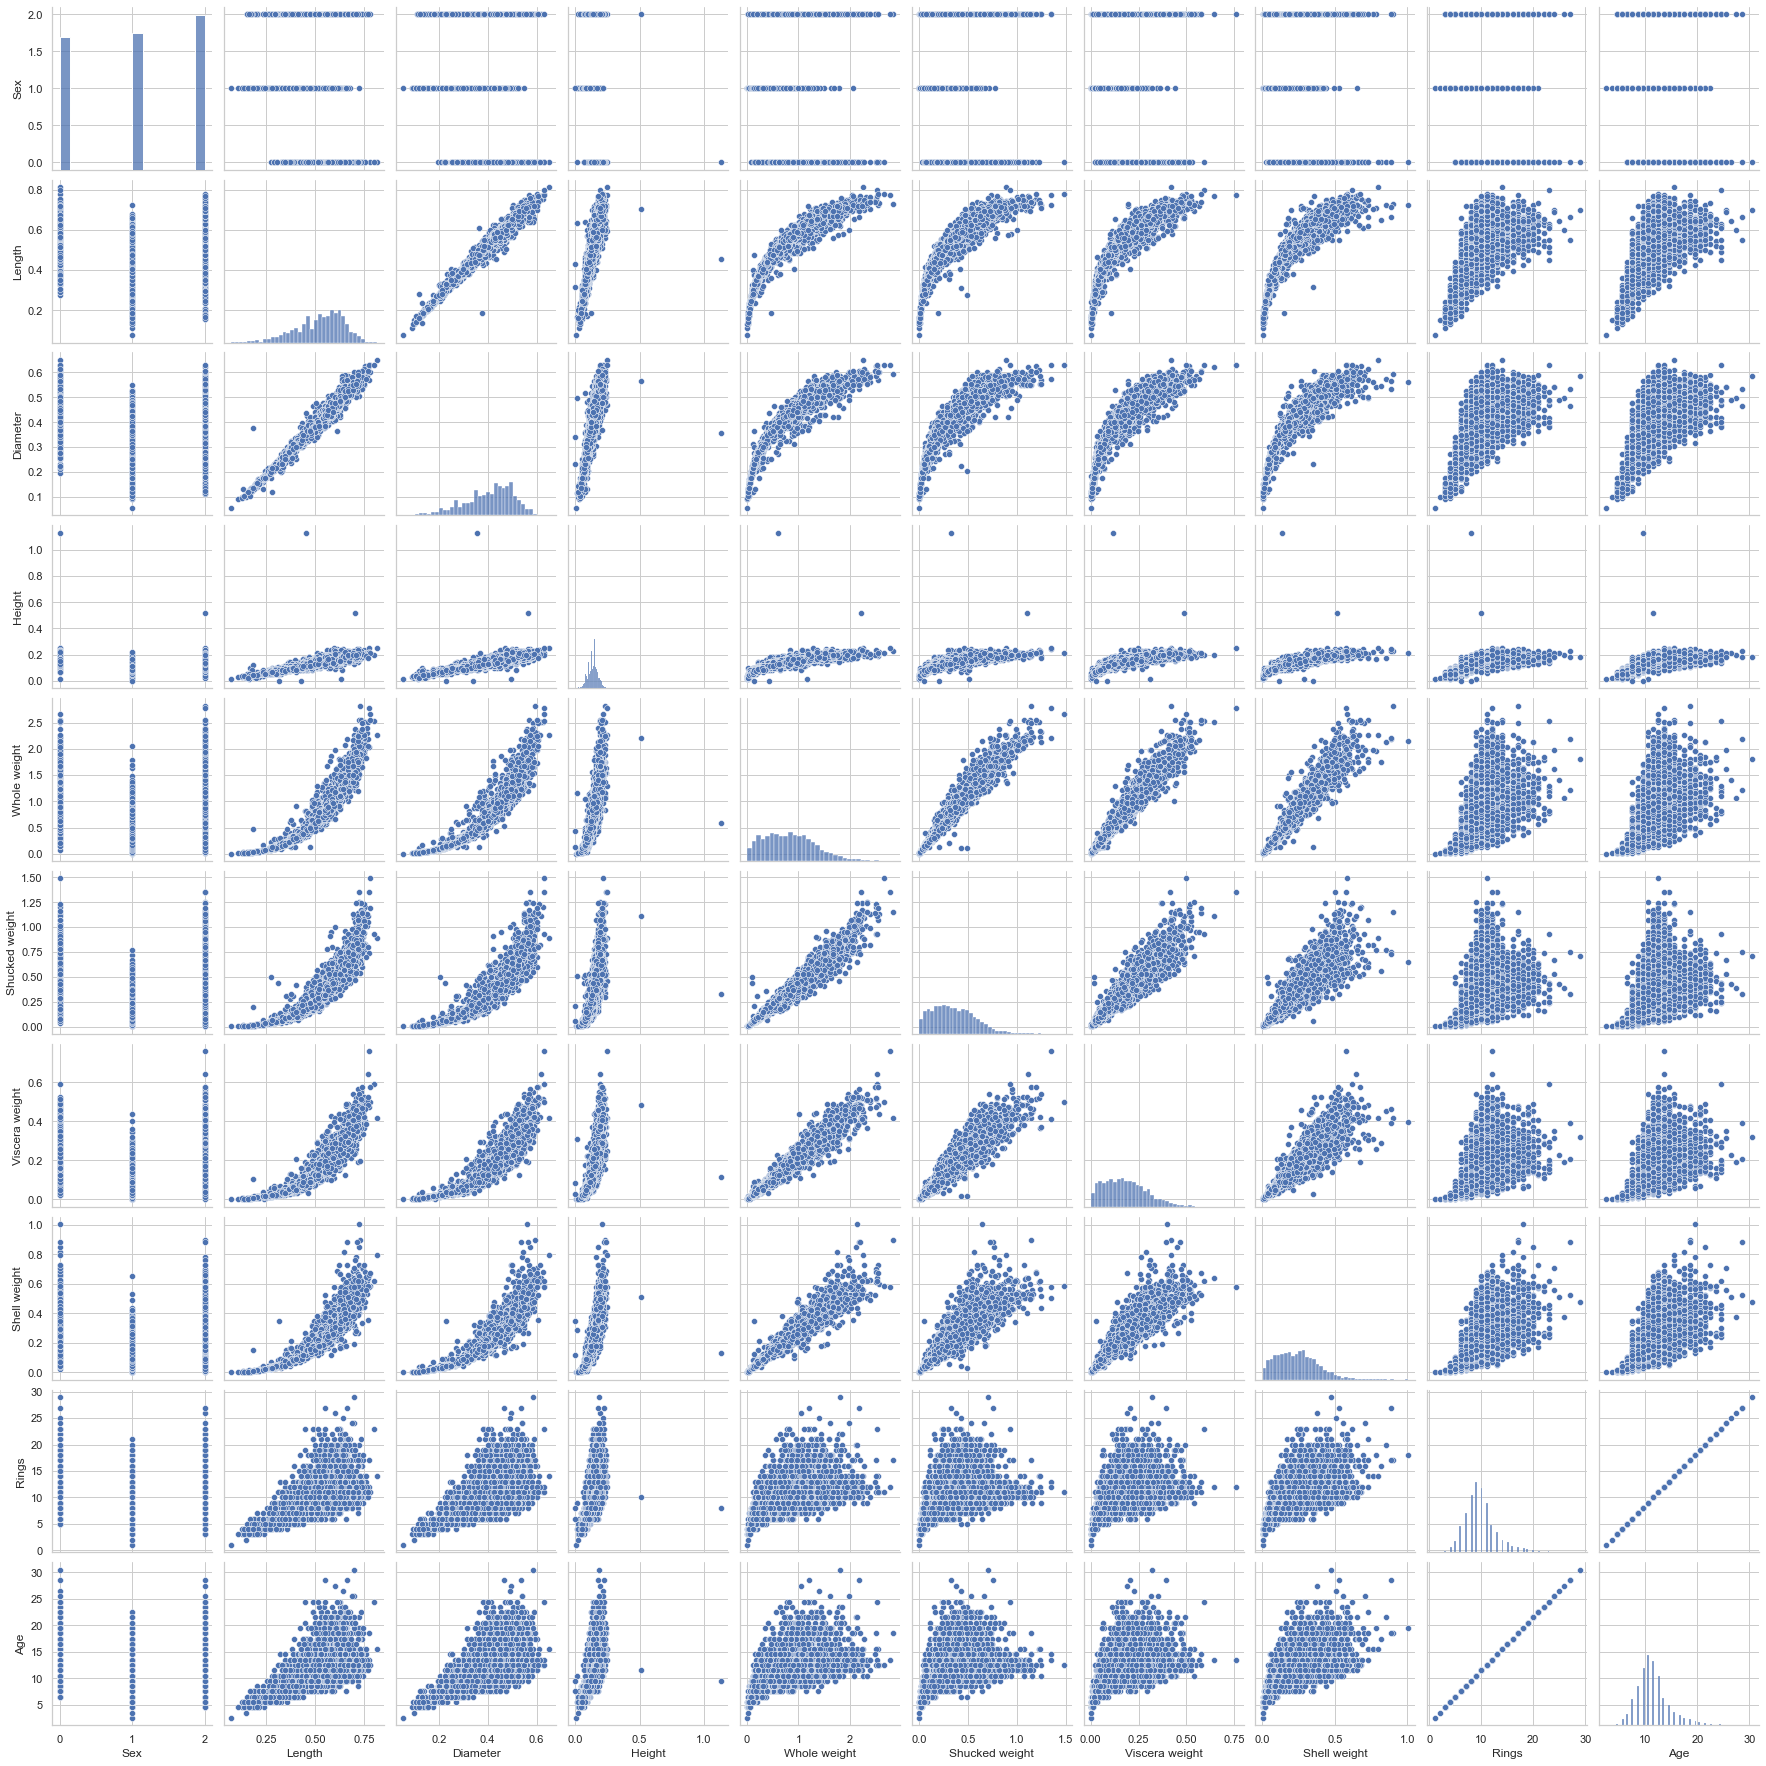

In [404]:
sns.pairplot(df1)
plt.show()

we can see ,
1.No of male Abalones are slightly higher than the other two.
2.when length increases Age will also increase
3.when diameter increases Age wil also increase
4.when age increases height will increase to certain limit and it will not increase further
5.when whole weight increases Age wil also increase gradually
6.when shucked weight increases Age wil also increase gradually
7.when viscera weight increases Age wil also increase gradually
8.when shell weight increases Age wil also increase gradually
9.when rings increases Age wil also increase 
10.most of the columns are positively correlated with the target column Age.
11.when rings increases all columns will increase to ceratin height and after if rings increase for highest the other columns will start to disapear and drops suddenly afterwards.

<AxesSubplot:xlabel='Sex', ylabel='Height'>

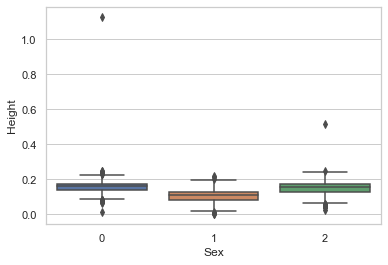

In [405]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Sex', y = 'Height', data = df1)

we can observe that the median height of female and male are similar.and infants has slighlty lesser than this range

<AxesSubplot:xlabel='Sex', ylabel='Whole weight'>

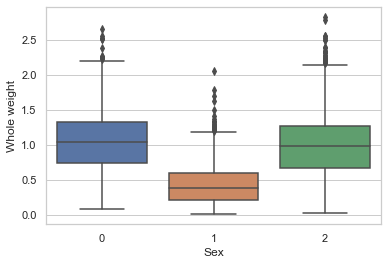

In [406]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Sex', y = 'Whole weight', data = df1)

we can observe that the male and female abalones have same mean of whole weight and infant abalones have lesser mean of whole weight

<AxesSubplot:xlabel='Sex', ylabel='Diameter'>

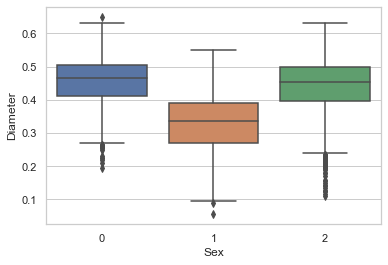

In [407]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Sex', y = 'Diameter', data = df1)

we can see that the mean of diameter of male and female abalones are almost nearby and the infant abalones have lesser mean and median of diameter than other two

<AxesSubplot:xlabel='Height', ylabel='Rings'>

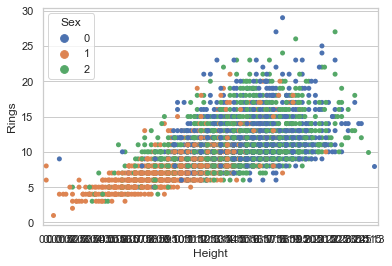

In [408]:
sns.set(style="whitegrid")
sns.swarmplot(x="Height", y="Rings",hue="Sex", data=df1)

we can observe when rings increases the height of all the abalones only increase to certain age and they will start to disappear and will not increase its height afterwards

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

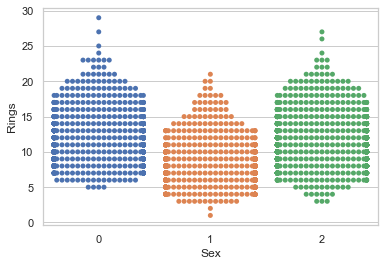

In [409]:
sns.set(style="whitegrid")
sns.swarmplot(x="Sex", y="Rings", data=df1)

we can see there are slightly more no of male abalones having ring counts than the other two abalones 

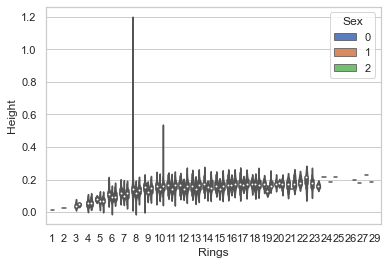

In [410]:
ax = sns.violinplot(y="Height", x="Rings", hue="Sex",
                    data=df1, palette="muted")

when rings increases, the median of height increase only to certain level only and will not increase afterwards. 

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

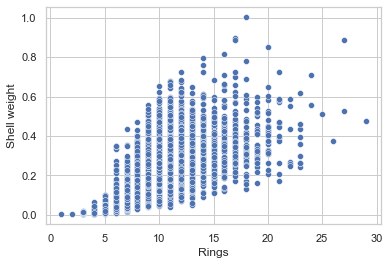

In [411]:
sns.scatterplot(x="Rings",y="Shell weight",data=df1)

the shell weight increases and having high correlation with rings only until when rings reaches to count number 0f 15 and afterwards the weight remains the same even if the rings increases and when rings increase further the shell weight increase will start to disappear

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

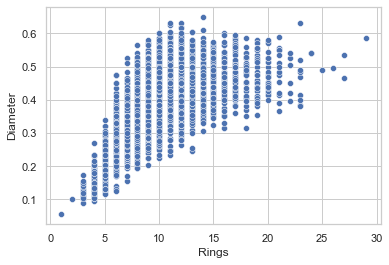

In [412]:
sns.scatterplot(x="Rings",y="Diameter",data=df1)

the diameter(size of the abalone) increases and having high correlation with rings only until when rings reaches to count number 0f 16 and afterwards the diameter remains the same even if the rings increases and when rings increase further the diameter increase will start to disappear

<AxesSubplot:xlabel='Height', ylabel='Rings'>

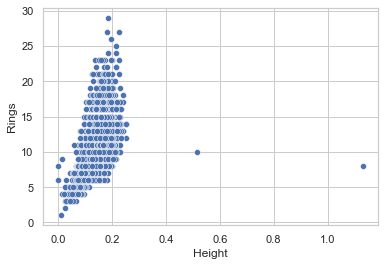

In [413]:
sns.scatterplot(y="Rings",x="Height",data=df1)

when age increases height will increase to certain limit and it will not increase further 

<AxesSubplot:xlabel='Rings', ylabel='Age'>

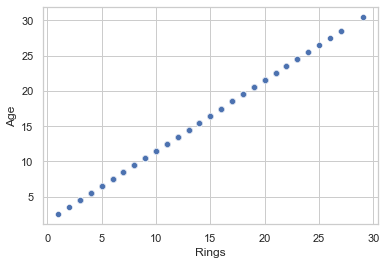

In [414]:
sns.scatterplot(y="Age",x="Rings",data=df1)

when rings increases Age wil also increase

In [415]:
#find correlation co.efficient of all variables in table
df1.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


we can observe that shell weight and diameter are most positvely correlated with the target column Age.and there is no any multicollinearity exists in between features or in relation with target column.all columns are positively correlated with the target except sex column

<AxesSubplot:>

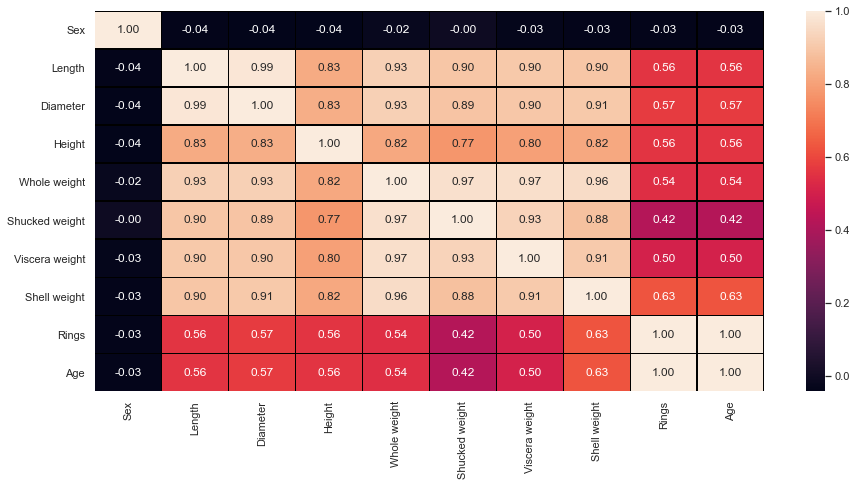

In [416]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

sex is most negatively correlated and its no need for prediction too because will not imapct much.so we can drop  this.except that all other columns are positively correlated with the target column

In [417]:
df1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


we can see mean and std dev are ok.no columns are having much skewness

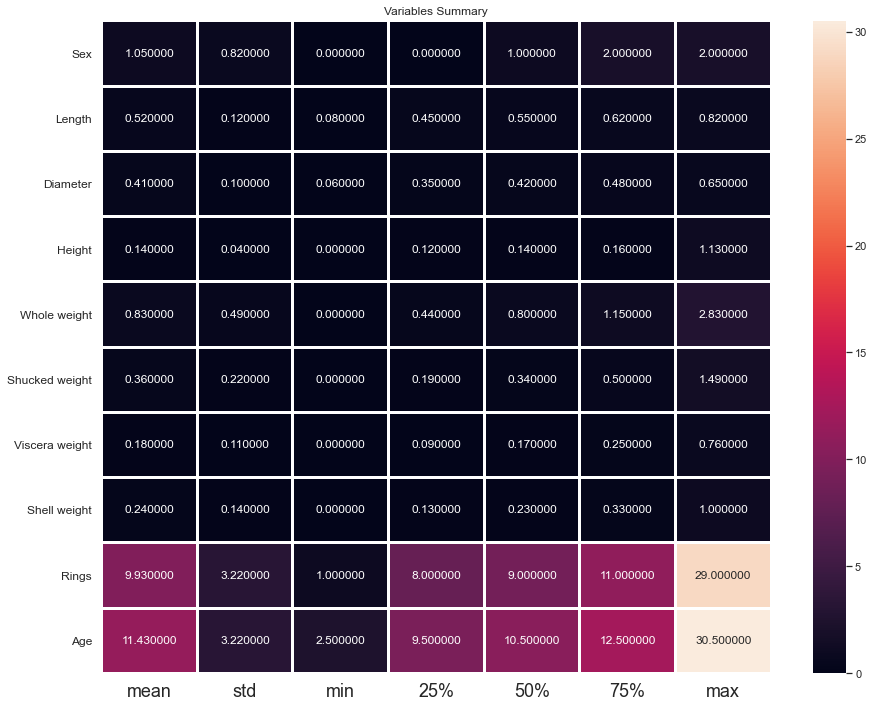

In [418]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [419]:
#drop sex column
df1=df1.drop(['Sex'],axis=1)
df1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


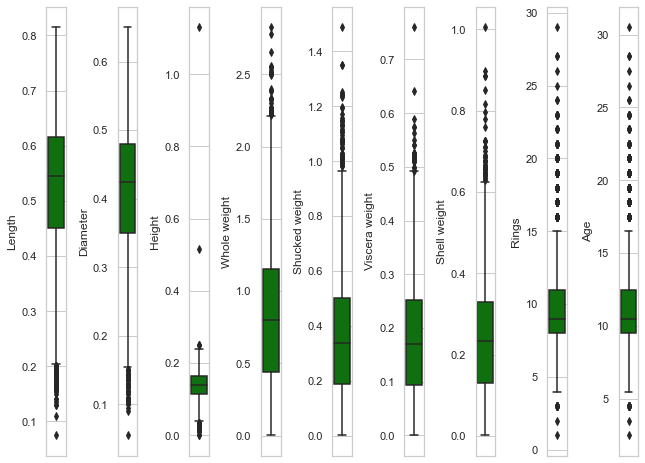

In [420]:
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

more outliers are present in height,shucked weight and shell weight.except that all columns are having outliers so let us remove that now

In [421]:
#ckeck skewness
df1.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [422]:
import statsmodels.api as sm
from scipy import stats


In [423]:
df1.shape

(4177, 9)

In [424]:
df1.shape[1]


9

#checking Z-score to remove outliers

In [425]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape


(4177, 9)

In [426]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [427]:
df_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


some outliers got removed

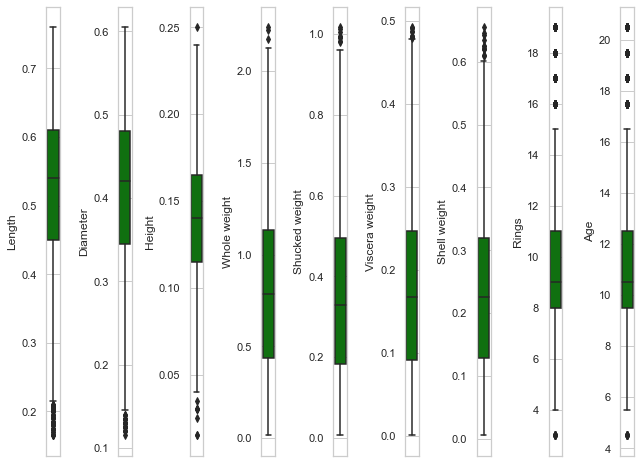

In [428]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

see the height column got removed outliers too and it has more normal distribution now

In [429]:
#finds data loss
loss_percent=(4177-4027)/(4177*100)
print(loss_percent)

0.0003591094086665071


data loss percentage is very low.data is cleaned also

In [430]:
df_new


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [431]:
df_new.shape

(4027, 9)

In [432]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [433]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.68803217,
        -0.58635376,  1.67302767],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.33285416,
        -1.33271691, -0.97812692],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.24037305,
        -0.08021413, -0.15943946],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  1.08965131,
         0.66363183, -0.15943946],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.87642835,
         0.57752029,  0.20009181],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  1.73214622,
         1.85675543,  0.84488768]])

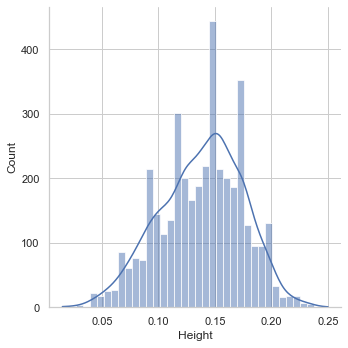

In [434]:
sns.displot(df_new["Height"],kde=True)

see the height column got removed outliers too and it has more normal distribution now

In [435]:
#train test split the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [436]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.32587672, 0.35159472, 0.27546358, ..., 0.29566722, 0.30234124,
        0.84400167],
       [0.1798726 , 0.17972166, 0.25645617, ..., 0.14998212, 0.14383372,
        0.39647011],
       [0.45400254, 0.46792148, 0.43673039, ..., 0.39680716, 0.40983173,
        0.5346697 ],
       ...,
       [0.59399609, 0.60192475, 0.76093544, ..., 0.69730051, 0.56780466,
        0.5346697 ],
       [0.64918964, 0.62833268, 0.5015694 , ..., 0.64912689, 0.54951688,
        0.59536084],
       [0.8591506 , 0.83227385, 0.71116889, ..., 0.84245984, 0.82119212,
        0.70420643]])

Linear Regression

In [437]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [438]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:97.92809029851462
At random state 0,the testing accuracy is:97.8458706133364


At random state 1,the training accuracy is:97.88763555657141
At random state 1,the testing accuracy is:98.00865881808122


At random state 2,the training accuracy is:97.93707254927595
At random state 2,the testing accuracy is:97.82064051897311


At random state 3,the training accuracy is:97.88049811940982
At random state 3,the testing accuracy is:98.04320479398547


At random state 4,the training accuracy is:97.86889491428386
At random state 4,the testing accuracy is:98.09520720442548


At random state 5,the training accuracy is:97.87047382978943
At random state 5,the testing accuracy is:98.08483793561811


At random state 6,the training accuracy is:97.88363288497315
At random state 6,the testing accuracy is:98.02106151517042


At random state 7,the training accuracy is:97.90981622788394
At random state 7,the testing accuracy is:97.9165959292996


At random state 8,

In [439]:
#at random state 11 performance is good
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [440]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: -100.19185053065974


In [441]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is 97.89477636930555 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 3 the cv score is 97.9015520464372 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 4 the cv score is 97.80797692699335 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 5 the cv score is 97.53874841695769 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 6 the cv score is 97.74077952894864 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 7 the cv score is 97.75836311496245 and accuracy score for Training is -93.65735174550827 and accuracy score for Testing is -100.19185053065974


At cross fold 8 the cv score is 97.676296

model performs well

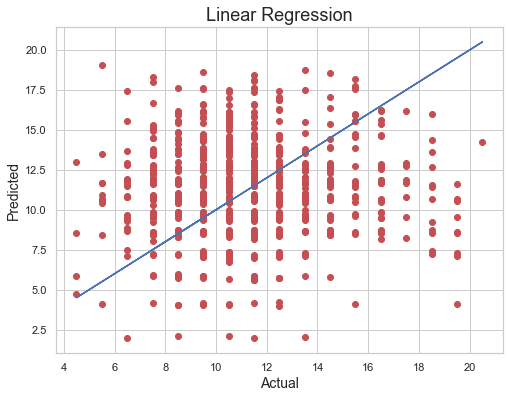

In [442]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [443]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 3.155522596364421
mean squared error 16.054684670534098
Root mean squared error 4.006829753125793
r2_score is -100.19185053065974


In [444]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,7.5,7.414984
1,12.5,12.401612
2,16.5,16.199429
3,8.5,8.426480
4,16.5,16.198382
...,...,...
801,12.5,12.849534
802,14.5,14.466525
803,14.5,14.297814
804,6.5,5.801110


errors are very less,Thus the model performs well

lasso regression

In [445]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.0001, 'random_state': 0}


In [446]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: -100.19185053065974


In [447]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974
At cv :- 9
cv_score is: 97.53991277688223
accuracy score---r2_score is -100.19185053065974


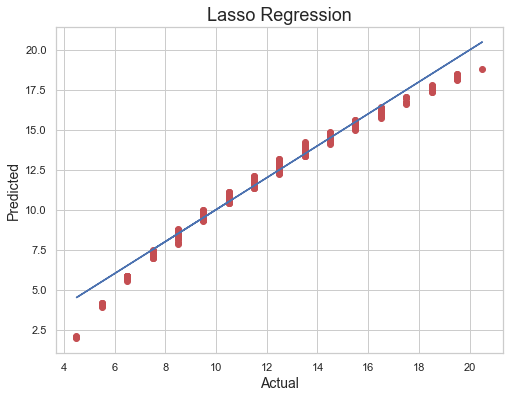

In [448]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

thus the Lasso regression performs well here.all data points are near to best fit line

In [449]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 0.2796084661555755
mean squared error 0.16886994381843926
Root mean squared error 0.4109378831629414
r2_score is 97.89429769280562


RandomForestRegressor

In [450]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'criterion': 'mae', 'max_features': 'auto'}


In [451]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: -100.19185053065974
score of model is: 100.0


In [452]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 99.99999792260277


Ridge Regressor

In [453]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'tol': 0.001}


In [454]:

rd=Ridge()
rd=Ridge(alpha=0.01,fit_intercept=True,normalize=True,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: -100.19185053065974
score of model is: 97.87614242912737


In [455]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 97.53910168768229


In [456]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 0.2801607833177347
mean squared error 0.16866067041078955
Root mean squared error 0.41068317522244513
r2_score is 97.89690720097124


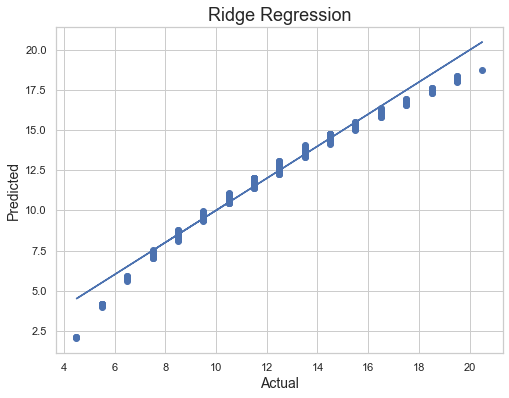

In [457]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

thus the Ridge regression performs well here.all data points are near to best fit line

Decison Tree Regressor

In [458]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'mse', 'splitter': 'best'}


In [459]:
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: -100.19185053065974
score of model is: 100.0


In [460]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 100.0


In [461]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 0.0
mean squared error 0.0
Root mean squared error 0.0
r2_score is 100.0


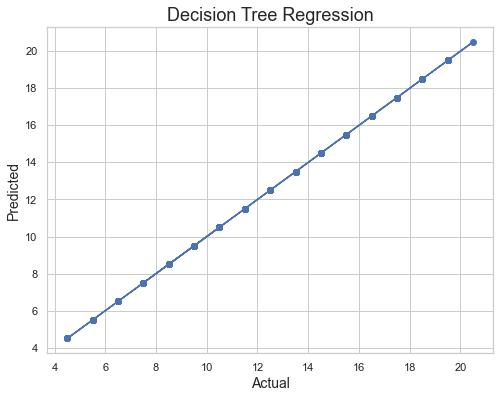

In [462]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

thus the Decision Tree regression performs well here.all data points are near to best fit line

RandomForestRegressor

In [ ]:
##perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


In [ ]:
rf=RandomForestRegressor(criterion='friedman_mse',n_estimators= 200)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

In [ ]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

In [ ]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

thus the Random Forest Regression performs well here.all data points are near to best fit line

GradientBoostingRegressor

In [ ]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



In [ ]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators= 200)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

In [ ]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

In [ ]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

Support Vector Regressor

In [ ]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


In [ ]:
sv=SVR(kernel='rbf',gamma='auto')
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

In [ ]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

In [ ]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

thus the Support Vector Regression performs well here.all data points are near to best fit line

From the above models,Decision Tree Regression performs the best.so it it the best model

In [ ]:
import pickle
filename='happy.pkl'
pickle.dump(dt,open(filename,'wb'))


In [ ]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor']
        


In [ ]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100]
scores

In [ ]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

In [ ]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()


From the above models,Decision Tree Regression performs the best.so it it the best model